# Analyze your own annotations!

Change the `myUsername` variable below to your Hypothes.is username, and run all the cells below. You may need to install the `wordcloud` library using Anaconda. Usually you can do that by opening a terminal and typing `conda install wordcloud`. 

In [1]:
import requests
import json
import pandas as pd
from time import sleep
import wordcloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,6]

In [2]:
myUsername = "JonathanReeve"

In [3]:
textUrl = 'https://icla2020.jonreeve.com/texts/moonstone.html'
def getUsers(offset=0): 
    """ Gets a list of users who have annotated *The Moonstone*."""
    params = {'url': textUrl,
              'limit': 200,
              'offset': offset}
    response = requests.get('https://hypothes.is/api/search', params=params)
    if response.ok: 
        parsed = json.loads(response.text)
        users = list(set([row['user'] for row in parsed['rows']]))
        return users
    else: 
        print('Response not OK!')
        return response

In [13]:
def getUserAnnotations(user, offset=0):
    """ Get all annotations, including metadata, for a user. """
    params = { 'url': textUrl,
               'user': user,
              'limit': 100,
              'offset': offset}
    response = requests.get('https://hypothes.is/api/search', params=params)
    if response.ok: 
        parsed = json.loads(response.text)
        return parsed
    else: 
        print('Response not OK!')
        return response

In [14]:
users = getUsers()

In [15]:
def plotTimes(label, rows):
    times = [pd.to_datetime(row['created']) for row in rows]
    df = pd.DataFrame([1 for i in range(len(times))], index=times, columns=[label])
    df = df.resample('D').sum()
    df.plot(kind='bar')
    return df

In [16]:
def plotUser(username): 
    page = getUserAnnotations(username)
    rows = page['rows']
    df = plotTimes(username, rows)
    return df

In [17]:
def formatUsername(username): 
    return "acct:{}@hypothes.is".format(username)

In [18]:
def getAnnotations(username):
    formattedUsername = formatUsername(username)
    page = getUserAnnotations(formattedUsername)
    rows = page['rows']
    texts = [row['text'] for row in rows]
    return texts

In [19]:
def makeWordCloud(username):
    myAnnotations = getAnnotations(username)
    myAnnotationsJoined = '\n'.join(myAnnotations)
    myWordcloud = wordcloud.WordCloud().generate(myAnnotationsJoined)
    plt.imshow(myWordcloud, interpolation='bilinear')
    plt.axis("off")

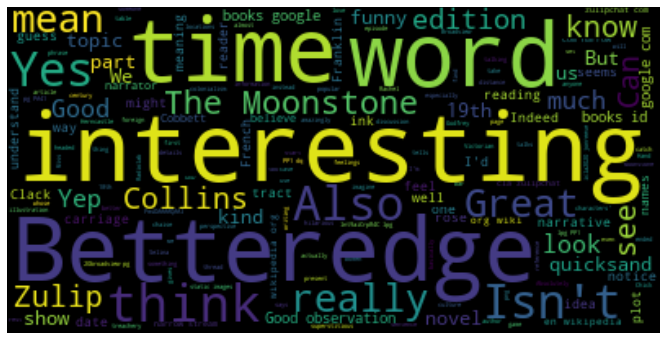

In [20]:
makeWordCloud(myUsername)

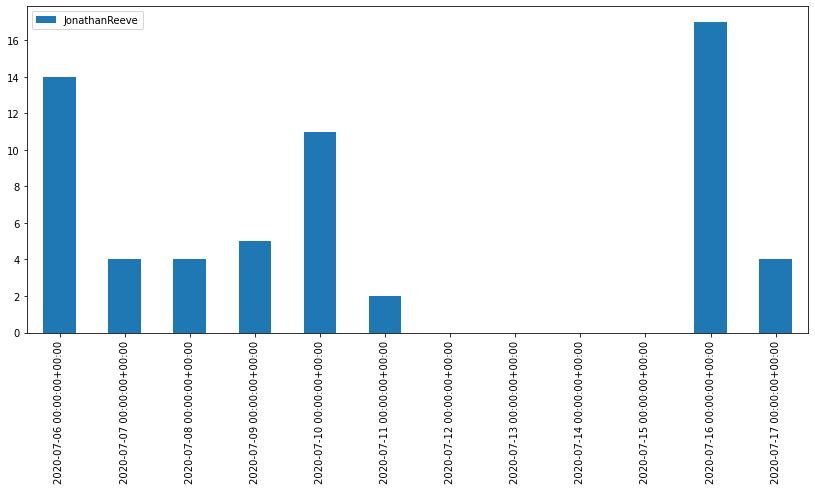

In [21]:
df = plotUser(myUsername)